In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

#### Tokenization
Tokenization is the process of breaking down text into smaller units called tokens. Tokens can be words, numbers, or punctuation marks. It's a crucial step in text preprocessing for NLP and text analysis applications.

#### Stemming
Stemming is the process of reducing words to their base or root form. It typically involves chopping off the ends of words in the hope of achieving this goal correctly most of the time. It's a somewhat crude approach that can lead to errors, but it's computationally efficient.

#### Lemmatization
Lemmatization, unlike stemming, involves resolving words to their dictionary form (lemma). It's a more sophisticated approach that uses vocabulary and morphological analysis, thus leading to better results than stemming for many applications.

#### Stopwords
Stopwords are common words that are often removed from texts before processing because they carry minimal meaningful information (examples include "and", "the", "a"). Removing stopwords can help improve the performance of NLP models by focusing on more relevant words.

#### Regular expressions
Regular expressions (regex) are sequences of characters that define a search pattern. They can be used for string searching and manipulation tasks, such as finding, replacing, or validating text. Regular expressions are extremely powerful for processing textual data and are widely used in programming and text processing tasks, including natural language processing (NLP).

Here’s a brief overview of how regular expressions work and some basic patterns:

Basic Syntax:
.: Matches any single character except newline \n.

^: Matches the start of a string.

$: Matches the end of a string.

*: Matches 0 or more occurrences of the preceding element.

+: Matches 1 or more occurrences of the preceding element.

?: Matches 0 or 1 occurrence of the preceding element.

\s: Matches whitespace characters (space, tab, newline).

\S: Matches non-whitespace characters.

\d: Matches digits, equivalent to [0-9].

\D: Matches non-digits.

\w: Matches word characters (letters, digits, or underscore).

\W: Matches non-word characters.

[abc]: Matches any one of the characters a, b, or c.

[a-z]: Matches any lowercase letter.

[A-Z]: Matches any uppercase letter.

[0-9]: Matches any digit.

|: Acts as an OR operator, matching either the pattern on its left or its right.

(pattern): Groups patterns together and can capture the text matched by the pattern for use in later operations.

#### Code

In [2]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [6]:
import nltk
import spacy
import re

# NLTK tasks
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')

text = "The foxes hunting on the boxes were quickly jumping over the lazy dogs 1,#."

print("**************")

# Tokenization
tokens = word_tokenize(text)
print("Tokens:", tokens)

print("**************")

# Filtering tokens using regex to only include alphabetic characters
alpha_tokens = [word for word in tokens if re.match("^[a-zA-Z]", word)]
print("Alphabetic Tokens:", alpha_tokens)

print("**************")

# Stemming
ps = PorterStemmer()
stemmed = [ps.stem(word) for word in alpha_tokens]
print("Stemmed:", stemmed)

print("**************")

# Stopwords Removal
stop_words = set(stopwords.words('english'))
filtered_sentence = [word for word in alpha_tokens if not word.lower() in stop_words]
print("Without Stopwords:", filtered_sentence)

print("**************")

# spaCy tasks for lemmatization
# Assuming spaCy and the English model have been installed
# Load the English model
nlp = spacy.load('en_core_web_sm')
doc = nlp(" ".join(alpha_tokens))  # Reconstructing the text from alphabetic tokens for spaCy
lemmatized = [token.lemma_ for token in doc]
print("Lemmatized with spaCy:", lemmatized)

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
**************
Tokens: ['The', 'foxes', 'hunting', 'on', 'the', 'boxes', 'were', 'quickly', 'jumping', 'over', 'the', 'lazy', 'dogs', '1', ',', '#', '.']
**************
Alphabetic Tokens: ['The', 'foxes', 'hunting', 'on', 'the', 'boxes', 'were', 'quickly', 'jumping', 'over', 'the', 'lazy', 'dogs']
**************
Stemmed: ['the', 'fox', 'hunt', 'on', 'the', 'box', 'were', 'quickli', 'jump', 'over', 'the', 'lazi', 'dog']
**************
Without Stopwords: ['foxes', 'hunting', 'boxes', 'quickly', 'jumping', 'lazy', 'dogs']
**************
Lemmatized with spaCy: ['the', 'fox', 'hunt', 'on', 'the', 'box', 'be', 'quickly', 'jump', 'over', 'the', 'lazy', 'dog']


In the heart of a bustling city stood a peculiar little bookstore, nestled between towering skyscrapers. Its wooden sign, "Whispers of the Past," creaked gently in the breeze, inviting the curious and the dreamers. Inside, amidst the maze of bookshelves, was Eli, a young man whose heart was as vast as the ocean and whose dreams soared even higher. Eli had stumbled upon this haven one rainy afternoon, seeking shelter from the storm both outside and within his heart.

#### Corpus
A corpus is whole data.

#### Documents
A document is an individual text or piece of writing within a corpus. Documents can vary in length and format, ranging from sentences and paragraphs to longer texts like articles, books, or chapters.

#### Vocabulary
The vocabulary of a corpus or document is the set of unique words or tokens that appear within it. 

#### Words/Tokens
Words or tokens are the individual elements of the text, typically separated by spaces or punctuation in English and many other languages. 

#### 1. One-hot Encoding
One-hot encoding converts each word in the vocabulary to a vector with a 1 in the position corresponding to the word's index and 0s in all other positions. The vocabulary is the set of all unique words across all sentences.

Given the sentences:

"The quick brown fox jumps over the lazy dog."
"A good book can transport you to another world."
"Music brings joy to many people's lives."
Assuming a simplified vocabulary extracted from these sentences might look like {"The", "quick", "brown", ..., "lives"}.

The one-hot encoding for the word "quick" in a vocabulary of size N (where N is the total number of unique words) might look like [0, 1, 0, 0, ..., 0] where the "1" is in the position corresponding to "quick".

#### 2. Bag of Words (BoW)
BoW represents text data as the histogram of the words in the text. The order of words is ignored, only their frequency counts matter.

From the sentences:

"The quick brown fox jumps over the lazy dog."
"A good book can transport you to another world."
"Music brings joy to many people's lives."
The BoW representation might count the occurrence of each word across all sentences, resulting in a vector like: [1(The), 1(quick), 1(brown), ..., 1(lives)]. Each entry corresponds to the count of a word from the vocabulary in the given text.

#### 3. n-grams (Bigram and Trigram)
n-grams are continuous sequences of n items from a given sample of text. Bigrams are 2-grams, and trigrams are 3-grams.

For the sentence: "The quick brown fox jumps."

Bigrams: ["The quick", "quick brown", "brown fox", "fox jumps"]
Trigrams: ["The quick brown", "quick brown fox", "brown fox jumps"]
Applying this to all three sentences gives a set of bigrams and trigrams that capture more context than individual words.

#### 4. TF-IDF (Term Frequency-Inverse Document Frequency)
TF-IDF measures the importance of a word in a document relative to a collection of documents (corpus). It increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus.

TF(word) = (Number of times the word appears in a document) / (Total number of words in the document)
IDF(word) = log((Total number of documents) / (Number of documents containing the word))
For the sentences:

"The quick brown fox jumps over the lazy dog."
"A good book can transport you to another world."
"Music brings joy to many people's lives."
TF-IDF would calculate the importance of each word within each sentence against the "document" set of all three sentences. Words that appear frequently in one sentence but not often in the others (like "fox" or "music") would get a higher TF-IDF score, indicating they're more important in the context of their respective sentences.

Each of these techniques serves to translate text into a numerical format for analysis, with each having its own use cases and advantages depending on the NLP task at hand.

CBOW (Continuous Bag of Words) and Skip-gram are two models introduced by Mikolov et al. in the Word2Vec framework for learning word embeddings. Both models learn to embed words into a high-dimensional vector space based on their context, but they approach the problem differently.

Given the sentences for illustration:

"The quick brown fox jumps over the lazy dog."
"A good book can transport you to another world."
"Music brings joy to many people's lives."
CBOW
CBOW predicts a target word based on its context. A context is defined as a window of surrounding words. For example, if we choose a window size of 2, for the target word "brown" in the first sentence, the context is ["The", "quick", "fox", "jumps"].

CBOW takes the average or sums the vectors of these context words and uses this combined vector to predict the target word. The model is trained such that the word vectors lead to a high probability of the correct target word.

Skip-gram
Skip-gram does the opposite: it uses a target word to predict its context. Again, using "brown" as the target and a window size of 2, the Skip-gram model aims to predict the context words ["The", "quick", "fox", "jumps"] from "brown".

Skip-gram treats each context-target pair as a new observation and learns to predict the context given the target word. It's effective for learning high-quality embeddings for words, especially for rare words, because it treats each context-target pair as a new observation.

In [3]:
pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 41.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 6.3 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 24.2 MB/s eta 0:00:0000:010:01
  Attempting uninstall: pip
    Found existing installation: pip 23.0.1
    Uninstalling pip-23.0.1:
      Successfully uninstalled pip-23.0.1
Note: you may need to restart the kernel to use updated packages.


In [6]:
!pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 kB 7.9 MB/s eta 0:00:00a 0:00:01


[--------------------------------------------------] 1.4% 23.4/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=-------------------------------------------------] 3.3% 54.6/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==------------------------------------------------] 5.2% 86.5/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===-----------------------------------------------] 7.1% 117.8/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[====----------------------------------------------] 9.0% 149.6/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=====---------------------------------------------] 10.9% 181.3/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[======--------------------------------------------] 12.8% 212.7/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=======-------------------------------------------] 14.7% 245.0/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[========------------------------------------------] 16.6% 276.2/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=========-----------------------------------------] 18.5% 308.3/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==========----------------------------------------] 21.7% 361.4/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[============--------------------------------------] 25.4% 422.0/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=============-------------------------------------] 27.4% 456.1/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===============-----------------------------------] 30.9% 514.4/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=================---------------------------------] 34.5% 573.7/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==================--------------------------------] 36.4% 605.1/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===================-------------------------------] 39.8% 662.0/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=====================-----------------------------] 43.0% 715.6/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[======================----------------------------] 46.0% 764.5/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=======================---------------------------] 47.8% 795.2/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=========================-------------------------] 51.3% 853.6/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===========================-----------------------] 55.5% 922.5/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[============================----------------------] 57.4% 954.5/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==============================--------------------] 61.4% 1020.8/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[================================------------------] 65.2% 1083.4/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=================================-----------------] 67.2% 1116.6/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==================================----------------] 69.0% 1147.5/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=====================================-------------] 74.1% 1232.4/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=====================================-------------] 75.9% 1262.7/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=======================================-----------] 79.6% 1322.8/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=========================================---------] 82.3% 1368.9/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==========================================--------] 84.1% 1399.2/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[============================================------] 88.8% 1476.1/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=============================================-----] 90.7% 1507.5/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===============================================---] 94.3% 1568.8/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[================================================--] 96.2% 1599.7/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=================================================-] 99.9% 1660.4/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Vector for 'king': [ 1.25976562e-01  2.97851562e-02  8.60595703e-03  1.39648438e-01
 -2.56347656e-02 -3.61328125e-02  1.11816406e-01 -1.98242188e-01
  5.12695312e-02  3.63281250e-01 -2.42187500e-01 -3.02734375e-01
 -1.77734375e-01 -2.49023438e-02 -1.67968750e-01 -1.69921875e-01
  3.46679688e-02  5.21850586e-03  4.63867188e-02  1.28906250e-01
  1.36718750e-01  1.12792969e-01  5.95703125e-02  1.36718750e-01
  1.01074219e-01 -1.76757812e-01 -2.51953125e-01  5.98144531e-02
  3.41796875e-01 -3.11279297e-02  1.04492188e-01  6.17675781e-02
  1.24511719e-01  4.00390625e-01 -3.22265625e-01  8.39843750e-02
  3.90625000e-02  5.85937500e-03  7.03125000e-02  1.72851562e-01
  1.38671875e-01 -2.31445312e-01  2.83203125e-01  1.42578125e-01
  3.41796875e-01 -2.39257812e-02 -1.09863281e-01  3.32031250e-02
 -5.46875000e-02  1.53198242e-02 -1.62109375e-01  1.58203125e-01
 -2.59765625e-01  2.01416016e-02 -1.63085938e-01  1.35803223e-03
 -1.44531250e-01 -5.68847656e-02  4.29687500e-02 -2.46582031e-02
  1.85

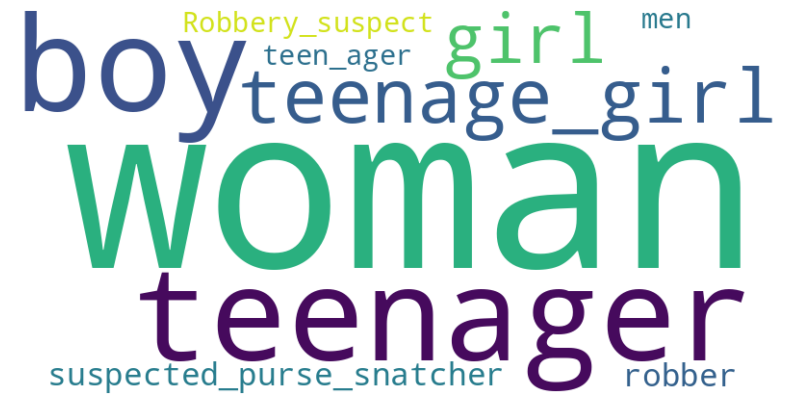

In [7]:
# Import necessary libraries
import gensim
import gensim.downloader as api
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load pre-trained Word2Vec model from Gensim's Data API
wv = api.load('word2vec-google-news-300')

# Retrieve the vector for a specific word
vec_king = wv['king']
print("Vector for 'king':", vec_king)

# Find words most similar to a given word
most_similar_man = wv.most_similar('man')
print("Words most similar to 'man':", most_similar_man)

# Compute similarity between two words
similarity_man_king = wv.similarity('man', 'king')
print("Similarity between 'man' and 'king':", similarity_man_king)

# Vector arithmetic: King - Man + Woman = ?
vec_queen_like = wv['king'] - wv['man'] + wv['woman']
most_similar_to_queen_like = wv.most_similar([vec_queen_like])
print("Most similar to 'king' - 'man' + 'woman':", most_similar_to_queen_like)

# Creating a WordCloud from the most similar words to 'man'
similar_words = dict(most_similar_man)  # Convert list of tuples to dictionary
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate_from_frequencies(similar_words)

# Display the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Average Word2Vec
Average Word2Vec is a technique used in natural language processing (NLP) to represent entire texts or sentences as vectors, leveraging the power of word embeddings obtained from models like Word2Vec. While Word2Vec provides a dense vector representation for individual words, Average Word2Vec aims to extend this representation to larger units of text by averaging the vectors of all words in the text.

The process for creating an Average Word2Vec representation for a sentence or document involves the following steps:

Tokenization: The text is split into individual words or tokens.

Vectorization: Each word in the text is converted into its vector representation using a pre-trained Word2Vec model. These models map words to high-dimensional space based on their context and usage in a large corpus, capturing semantic relationships between words.

Averaging: The vectors corresponding to all words in the text are averaged together to produce a single vector. This step typically involves summing up all word vectors and then dividing by the number of words to obtain the mean vector. It's important to only include vectors for words that are present in the Word2Vec model's vocabulary; words not in the vocabulary are ignored.

Normalization (optional): The resulting vector can be normalized to have a unit length. This step is not always necessary but can be beneficial for certain applications.

Advantages of Average Word2Vec:
Simplicity: The method is straightforward to implement and understand.
Fixed-length vectors: It produces a fixed-length vector for any text, regardless of its original length, making it suitable for use in machine learning models that require fixed-size input.
Semantic richness: By leveraging Word2Vec embeddings, it captures a rich semantic representation of the text based on the meanings of individual words.

Limitations:
Loss of word order: Averaging word vectors loses the original order of words, which can be critical for understanding the meaning of sentences.
Ignoring out-of-vocabulary words: Words not present in the Word2Vec model's vocabulary are ignored, potentially losing important information.
Homogenization of meaning: Averaging can dilute the specific meanings of words when they are combined, especially in texts with words of contrasting meanings.

Use Cases:
Average Word2Vec is often used as a feature extraction technique for text data in various NLP tasks, including text classification, sentiment analysis, and clustering. It provides a way to leverage pre-trained word embeddings for tasks where the input needs to represent larger units of text rather than individual words.

#### LSTM

https://colah.github.io/posts/2015-08-Understanding-LSTMs/